In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
import os
import glob
import numpy as np

## Read Data

In [52]:
#Features    
path = r'C:\Users\intan.septiana\Documents\springboard\Capstone project\Dataset\features'                     
all_files = glob.glob(os.path.join(path, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [53]:
#Labels
label = pd.read_csv('../Dataset/labels/label.csv')

In [54]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [55]:
## check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16135561 entries, 0 to 16135560
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.3 GB


In [56]:
## check data types

label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
bookingID    20018 non-null int64
label        20018 non-null int64
dtypes: int64(2)
memory usage: 312.9 KB


In [57]:
## check null value

df.isna().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

In [58]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [59]:
df.shape

(16135561, 11)

In [60]:
label.shape

(20018, 2)

In [61]:
# check unique bookingID
print('features:',df.bookingID.nunique())
print('label:',label.bookingID.nunique())

features: 20000
label: 20000


In [62]:
# from above we can see that label contains 18 rows with duplicate ID, let's drop the duplicates

label = label.drop_duplicates()

In [63]:
label.shape

(20018, 2)

In [64]:
# After dropping the duplicates, the label shape remains the same, let's check the relationship first
#check label - features relationship
print('label bookingID in features: ',label[['bookingID']].drop_duplicates()[label['bookingID'].isin(df.bookingID.unique())].count())
print('label bookingID not in features: ',label[['bookingID']].drop_duplicates()[~label['bookingID'].isin(df.bookingID.unique())].count())

C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


label bookingID in features:  bookingID    20000
dtype: int64
label bookingID not in features:  bookingID    0
dtype: int64


C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [65]:
print('features bookingID in label: ',df[['bookingID']].drop_duplicates()[df['bookingID'].isin(label.bookingID.unique())].count())
print('features bookingID not in label: ',df[['bookingID']].drop_duplicates()[~df['bookingID'].isin(label.bookingID.unique())].count())

C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


features bookingID in label:  bookingID    20000
dtype: int64
features bookingID not in label:  bookingID    0
dtype: int64


C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [66]:
#From above, we can see that all unique ID in label and features related to each other, means the duplicated ID in label also
# appeared in features, now let's see the rows
ids = label["bookingID"]
label[ids.isin(ids[ids.duplicated()])].sort_values('bookingID')

,bookingID,label
12602,13,1
12463,13,0
2351,154618822837,1
5295,154618822837,0
11215,223338299461,1
6212,223338299461,0
19936,395136991308,0
6121,395136991308,1
17623,403726925929,1
8472,403726925929,0


In [67]:
# since the label with the same bookingID is inconsistent, 
# I decide to drop the 9 bookingIDs since we don't know the truth value of each bookingID
label = label[~ids.isin(ids[ids.duplicated()])]

In [68]:
label.shape

(19982, 2)

In [69]:
print('label: ',label.bookingID.nunique())

label:  19982


In [70]:
# merge features with label
df = df.merge(label, on='bookingID', how='inner')

In [71]:
df.to_csv('clean.csv',index=False)

In [72]:
print('shape: ',df.shape)
print('unique id: ',df.bookingID.nunique())

shape:  (16116704, 12)
unique id:  19982


In [73]:
## see summary

df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07
mean,8.184342e+11,1.161327e+01,1.689596e+02,6.897958e-02,4.473604e+00,8.958685e-01,-1.708257e-03,2.938396e-04,-2.601239e-04,3.807072e+03,9.006461e+00,3.052742e-01
std,4.951572e+11,8.696429e+01,1.072970e+02,1.424623e+00,8.128499e+00,3.250204e+00,1.446192e-01,3.402431e-01,1.481542e-01,1.437527e+06,8.106538e+00,4.605235e-01
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00,0.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.084229e-01,-1.932755e+00,-9.298957e-01,-2.679162e-02,-2.993423e-02,-1.876969e-02,2.410000e+02,1.020000e+00,0.000000e+00
50%,8.074539e+11,4.244000e+00,1.687888e+02,6.120300e-02,9.082404e+00,7.769897e-01,-6.420414e-04,2.663161e-04,-3.726278e-05,5.200000e+02,7.530000e+00,0.000000e+00
75%,1.254130e+12,8.000000e+00,2.629526e+02,6.347809e-01,9.709925e+00,2.751175e+00,2.331571e-02,3.144551e-02,1.823425e-02,8.620000e+02,1.548000e+01,1.000000e+00
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02,1.000000e+00


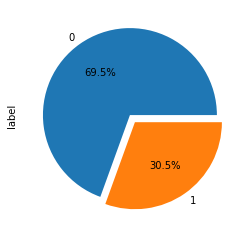

In [74]:
## let's see the target variable 
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

In [75]:
df['label'].value_counts()

0    11196690
1     4920014
Name: label, dtype: int64

In [76]:
df[df.label==0].describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,1.119669e+07,11196690.0
mean,8.039918e+11,1.109272e+01,1.696039e+02,6.921492e-02,4.533586e+00,8.662005e-01,-1.916872e-03,5.900878e-04,-3.415904e-04,5.150565e+03,9.180230e+00,0.0
std,4.927840e+11,8.598532e+01,1.067674e+02,1.315805e+00,8.188778e+00,3.059374e+00,1.184933e-01,2.497889e-01,1.139783e-01,1.724681e+06,8.074201e+00,0.0
min,0.000000e+00,8.000000e-01,0.000000e+00,-3.344084e+01,-5.780019e+01,-7.844842e+01,-3.347175e+01,-7.488861e+01,-3.651154e+01,0.000000e+00,-1.719776e+00,0.0
25%,3.779571e+11,3.900000e+00,7.900000e+01,-4.980092e-01,-1.999219e+00,-9.077606e-01,-2.671436e-02,-2.962024e-02,-1.838593e-02,2.170000e+02,1.260000e+00,0.0
50%,7.645042e+11,4.060000e+00,1.690963e+02,6.119633e-02,9.117126e+00,7.565908e-01,-7.476807e-04,2.792527e-04,-3.490659e-05,4.700000e+02,7.883960e+00,0.0
75%,1.211181e+12,8.000000e+00,2.624913e+02,6.249057e-01,9.718362e+00,2.671158e+00,2.298380e-02,3.103806e-02,1.809322e-02,7.790000e+02,1.565000e+01,0.0
max,1.700807e+12,6.070101e+03,3.599995e+02,4.770832e+01,6.115936e+01,6.365680e+01,3.983975e+01,6.254202e+01,6.630078e+01,1.495797e+09,5.669897e+01,0.0


In [77]:
df[df.label==1].describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4.920014e+06,4920014.0
mean,8.513013e+11,1.279790e+01,1.674932e+02,6.844401e-02,4.337100e+00,9.633851e-01,-1.233505e-03,-3.803452e-04,-7.472700e-05,7.496252e+02,8.611008e+00,1.0
std,4.989605e+11,8.914079e+01,1.084784e+02,1.645660e+00,7.987946e+00,3.646557e+00,1.912015e-01,4.870556e-01,2.057599e-01,5.663971e+02,8.165881e+00,0.0
min,1.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.593699e+01,-4.845575e+01,-5.734489e+01,-5.355445e+01,0.000000e+00,-2.000000e+00,1.0
25%,4.123169e+11,3.900000e+00,7.500000e+01,-5.339233e-01,-1.859183e+00,-9.826042e-01,-2.690379e-02,-3.085725e-02,-1.954769e-02,3.240000e+02,5.385036e-01,1.0
50%,8.589935e+11,4.424000e+00,1.670000e+02,6.121016e-02,8.991425e+00,8.291164e-01,-4.469291e-04,2.441406e-04,-4.459316e-05,6.600000e+02,6.692664e+00,1.0
75%,1.279900e+12,8.000000e+00,2.630000e+02,6.608198e-01,9.688137e+00,2.951265e+00,2.424189e-02,3.226613e-02,1.864624e-02,1.063000e+03,1.505000e+01,1.0
max,1.709397e+12,4.618294e+03,3.599985e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.070942e+01,8.031496e+01,5.594885e+01,8.235000e+03,1.480186e+02,1.0


In [78]:
df[df.bookingID==1202590843006].sort_values('second')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
251,1202590843006,3.024,316.0,1.438092,9.016305,3.961360,0.014591,0.007051,0.007191,0.0,0.000000,1
1012,1202590843006,3.022,316.0,1.164760,8.577515,3.941843,0.007924,-0.011746,-0.015464,1.0,0.000000,1
398,1202590843006,3.019,316.0,1.168935,8.514557,3.600678,0.439840,-0.056287,-0.064804,2.0,0.000000,1
925,1202590843006,3.018,316.0,1.504823,8.948865,3.965516,-0.010978,0.010629,0.002356,3.0,0.000000,1
966,1202590843006,3.017,316.0,1.405559,9.003942,3.923254,0.015446,-0.005725,-0.002025,4.0,0.000000,1
961,1202590843006,3.016,316.0,1.510799,9.020375,4.036892,0.007400,0.010140,0.002496,5.0,0.000000,1
1071,1202590843006,3.015,316.0,1.388417,8.934931,3.972460,-0.003281,0.000908,-0.012339,6.0,0.000000,1
250,1202590843006,3.015,316.0,1.432594,8.974598,4.086682,-0.004328,-0.003299,0.001222,7.0,0.000000,1
380,1202590843006,3.015,316.0,1.500647,9.021889,4.060633,0.004398,0.013003,0.009564,8.0,0.000000,1
478,1202590843006,3.014,316.0,1.404103,8.946911,3.938730,0.005760,-0.005358,-0.017523,9.0,0.000000,1
